<a href="https://colab.research.google.com/github/kernelfatima/Deep-Learning-1/blob/main/Face_mask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
!pip install kaggle

In [54]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
from google.colab import files
files.upload()

Saving face-mask-file.zip to face-mask-file.zip
Buffered data was truncated after reaching the output size limit.

In [55]:
import os
print(os.listdir("/content"))

['.config', 'kaggle.json', 'face-mask-dataset', 'face-mask-dataset.zip', 'face-mask-file.zip', 'drive', 'dataset.zip', 'sample_data']


In [56]:
import zipfile

zip_path = "/content/face-mask-file.zip"
extract_path = "/content/face-mask-dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Files extracted to:", extract_path)


Files extracted to: /content/face-mask-dataset


In [57]:
!ls

dataset.zip  face-mask-dataset	    face-mask-file.zip	sample_data
drive	     face-mask-dataset.zip  kaggle.json


In [58]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [59]:
with_mask_files = os.listdir('/content/face-mask-dataset/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1140.jpg', 'with_mask_1832.jpg', 'with_mask_1.jpg', 'with_mask_3250.jpg', 'with_mask_3308.jpg']
['with_mask_1262.jpg', 'with_mask_3485.jpg', 'with_mask_493.jpg', 'with_mask_621.jpg', 'with_mask_56.jpg']


In [60]:
without_mask_files = os.listdir('/content/face-mask-dataset/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2600.jpg', 'without_mask_247.jpg', 'without_mask_2508.jpg', 'without_mask_1126.jpg', 'without_mask_1356.jpg']
['without_mask_579.jpg', 'without_mask_980.jpg', 'without_mask_2351.jpg', 'without_mask_357.jpg', 'without_mask_2801.jpg']


In [61]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [62]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [63]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [64]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [65]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


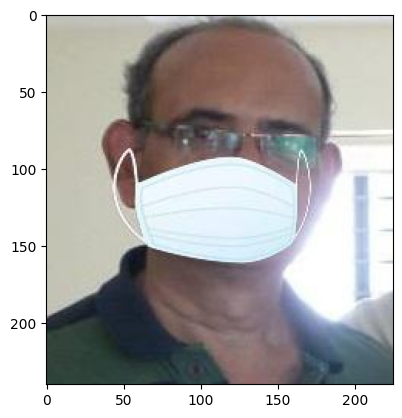

In [66]:
# displaying with mask image
img = mpimg.imread('/content/face-mask-dataset/data/with_mask/with_mask_1002.jpg')
imgplot = plt.imshow(img)
plt.show()

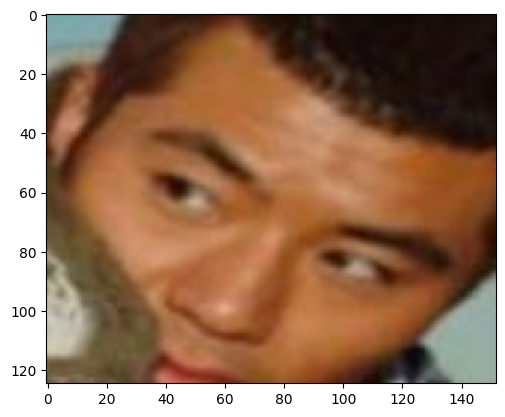

In [67]:
# displaying without mask image
img = mpimg.imread('/content/face-mask-dataset/data/without_mask/without_mask_1001.jpg')
imgplot = plt.imshow(img)
plt.show()

In [68]:
with_mask_path = '/content/face-mask-dataset/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/face-mask-dataset/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [69]:
type(data)

list

In [70]:
len(data)

7553

array([[[ 48,  48,  58],
        [ 49,  49,  59],
        [ 49,  49,  59],
        ...,
        [ 90,  92, 104],
        [ 92,  94, 106],
        [103, 105, 117]],

       [[ 48,  48,  58],
        [ 49,  49,  59],
        [ 50,  50,  60],
        ...,
        [ 90,  93, 102],
        [ 93,  97, 105],
        [101, 104, 113]],

       [[ 47,  50,  59],
        [ 47,  50,  59],
        [ 49,  50,  60],
        ...,
        [ 89,  93,  98],
        [ 93,  99, 105],
        [ 98, 104, 109]],

       ...,

       [[ 33,  36,  45],
        [ 33,  36,  45],
        [ 33,  36,  45],
        ...,
        [ 92, 101, 131],
        [ 82,  90, 119],
        [ 72,  79, 106]],

       [[ 34,  37,  46],
        [ 34,  37,  46],
        [ 33,  36,  45],
        ...,
        [ 80,  89, 120],
        [ 72,  80, 109],
        [ 60,  67,  92]],

       [[ 33,  36,  45],
        [ 33,  36,  45],
        [ 33,  36,  45],
        ...,
        [ 74,  83, 112],
        [ 55,  65,  91],
        [ 47,  55,  78]]], dtype=uint8)
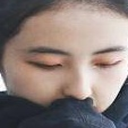

In [71]:
data[0]

In [72]:
type(data[0])

numpy.ndarray

In [73]:
data[0].shape

(128, 128, 3)

In [74]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [75]:
type(X)

numpy.ndarray

In [76]:
type(Y)

numpy.ndarray

In [77]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [78]:
print(Y)

[1 1 1 ... 0 0 0]


In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [80]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [81]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[110, 115, 111],
        [167, 172, 168],
        [184, 189, 185],
        ...,
        [218, 220, 215],
        [219, 221, 216],
        [218, 220, 215]],

       [[134, 139, 135],
        [ 92,  97,  93],
        [148, 153, 149],
        ...,
        [219, 221, 216],
        [221, 223, 218],
        [220, 222, 217]],

       [[215, 220, 216],
        [172, 177, 173],
        [107, 112, 108],
        ...,
        [219, 221, 216],
        [220, 222, 217],
        [219, 221, 216]],

       ...,

       [[194, 179, 176],
        [200, 185, 182],
        [189, 174, 171],
        ...,
        [143, 139, 128],
        [163, 159, 147],
        [189, 185, 174]],

       [[191, 176, 173],
        [192, 177, 174],
        [197, 182, 179],
        ...,
        [136, 132, 121],
        [148, 144, 132],
        [186, 182, 171]],

       [[192, 179, 175],
        [186, 172, 169],
        [184, 171, 168],
        ...,
        [143, 139, 129],
        [151, 147, 137],
        [178, 174, 163]]], dtype=uint8)
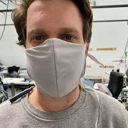

In [82]:
X_train[0]

In [83]:
X_train_scaled[0]

array([[[0.43137255, 0.45098039, 0.43529412],
        [0.65490196, 0.6745098 , 0.65882353],
        [0.72156863, 0.74117647, 0.7254902 ],
        ...,
        [0.85490196, 0.8627451 , 0.84313725],
        [0.85882353, 0.86666667, 0.84705882],
        [0.85490196, 0.8627451 , 0.84313725]],

       [[0.5254902 , 0.54509804, 0.52941176],
        [0.36078431, 0.38039216, 0.36470588],
        [0.58039216, 0.6       , 0.58431373],
        ...,
        [0.85882353, 0.86666667, 0.84705882],
        [0.86666667, 0.8745098 , 0.85490196],
        [0.8627451 , 0.87058824, 0.85098039]],

       [[0.84313725, 0.8627451 , 0.84705882],
        [0.6745098 , 0.69411765, 0.67843137],
        [0.41960784, 0.43921569, 0.42352941],
        ...,
        [0.85882353, 0.86666667, 0.84705882],
        [0.8627451 , 0.87058824, 0.85098039],
        [0.85882353, 0.86666667, 0.84705882]],

       ...,

       [[0.76078431, 0.70196078, 0.69019608],
        [0.78431373, 0.7254902 , 0.71372549],
        [0.74117647, 0

In [84]:
import tensorflow as tf
from tensorflow import keras

In [85]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [86]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [48]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 156s 901ms/step - acc: 0.6735 - loss: 0.6822 - val_acc: 0.9008 - val_loss: 0.2786
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 195s 862ms/step - acc: 0.8675 - loss: 0.3278 - val_acc: 0.9124 - val_loss: 0.2468
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 202s 862ms/step - acc: 0.8951 - loss: 0.2726 - val_acc: 0.9124 - val_loss: 0.2314
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 204s 873ms/step - acc: 0.9101 - loss: 0.2387 - val_acc: 0.9240 - val_loss: 0.2175
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 203s 879ms/step - acc: 0.9253 - loss: 0.1896 - val_acc: 0.8843 - val_loss: 0.3004


In [87]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 12s 250ms/step - acc: 0.5142 - loss: 0.6934
Test Accuracy = 0.5234943628311157


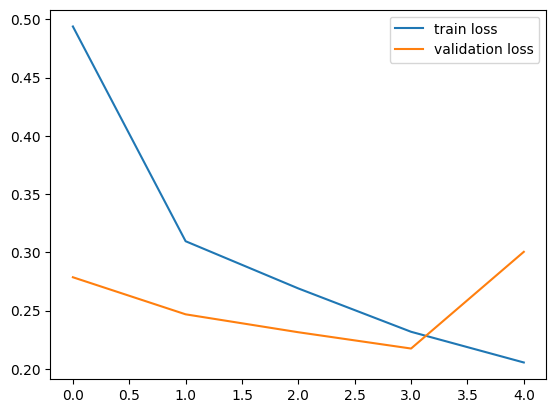

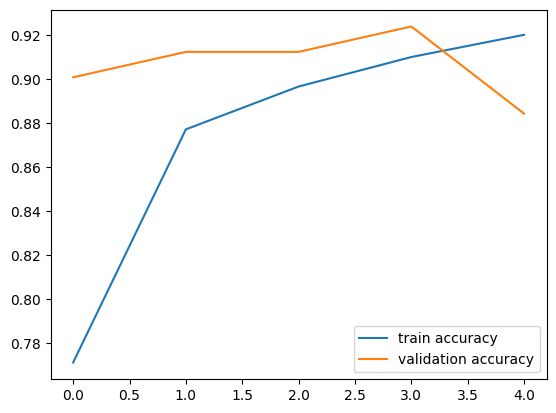

In [88]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/face-mask-dataset/data/with_mask/with_mask_1000.jpg


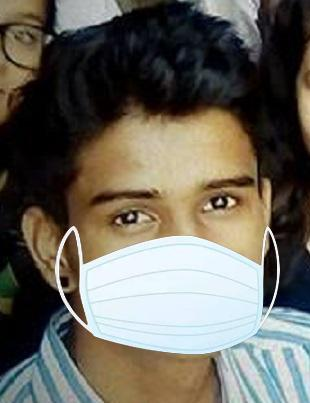

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
[[0.5238061  0.50317883]]
0
The person in the image is not wearing a mask


In [89]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/face-mask-dataset/data/without_mask/without_mask_1120.jpg


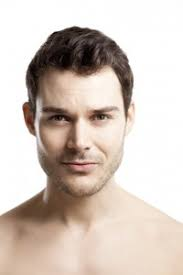

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
[[0.47529227 0.7706469 ]]
1
The person in the image is wearing a mask


In [52]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')